Importing the required packages

In [3]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5a/f2/5c2f878c62c8b79c629b11b33516bb55054d7677eba6f56f3a20296b56bd/tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.7 MB/s eta 0:00:00
  Obtaining dependency information for grpcio<2.0,>=1.24.3 from https://files.pythonhosted.org/packages/28/94/63bef715d0afea96662c66075d72249bf9b55b018b91b6937045bdc1470c/grpcio-1.58.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/0d/7a/e5558

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model

2023-09-10 05:29:17.367921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 05:29:17.475234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-10 05:29:17.475254: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-10 05:29:17.495040: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-10 05:29:18.168310: W tensorflow/stream_executor/platform/de

Downloading the CIFAR-10 dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Labels of classifier output

In [3]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Plotiing the input image

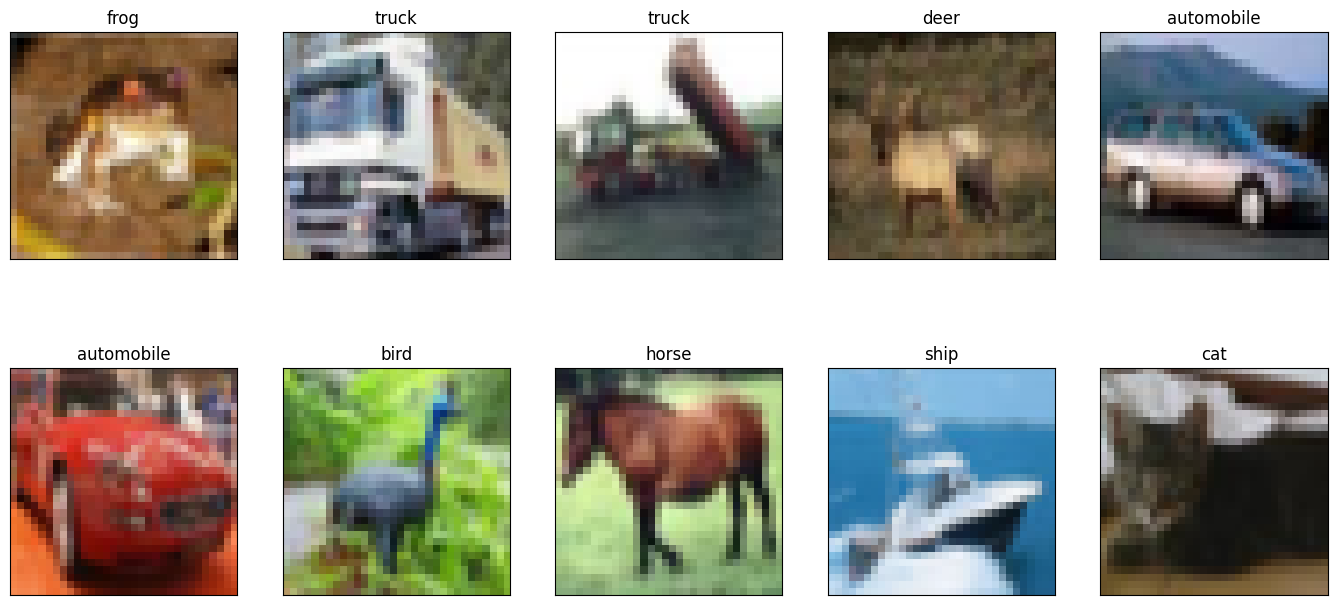

In [4]:
fig, axes = plt.subplots(ncols=5,nrows=2,figsize=(17,8))
index = 0
for i in range(2):
  for j in range(5):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(X_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()

Normalizing the input data

In [5]:
X_train = X_train/255
X_test = X_test/255

Encoding the ouput labels as 0s and 1

In [13]:
!pip3 install numpy

In [6]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Defining the input shape

In [7]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
input_shape

(32, 32, 3)

Designing the model

In [11]:
#define the model
model = Sequential()
model.add(Flatten())
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Saving and loading the model

In [12]:
model.save('CNN_CIFAR.h5')
model = load_model('CNN_CIFAR.h5')

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

Testing the model

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:%.2f%%" % (scores[1]*100))

2023-09-10 05:29:59.649882: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


Accuracy:10.68%


In [ ]:
plt.title("Accuracy")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

Plotting the loss across the epoches

In [ ]:
plt.title("Loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()